# Multiomics modeling

Let's look at the paper *"Multiomics modeling of the immunome, transcriptome, microbiome, proteome and metabolome adaptations during human pregnancy"* by **Ghaemi et al. 2019** (`task1_multiomics_ghaemi2019multiomics.pdf`).
The idea is to use biological measurements to characterize biological changes during pregnancy.
The authors use multiple modalities (measurements collected from the immune system, microbiome, etc.)
This includes whether we can predict the gestational age of a mother solely based on the collected biomarkers.

**Note**: There is no need to get acquainted with multiomics modeling, at least for this exercise. In the end, this is just a regular data science task :)

## Load the data

Load the data from `multiomics_data.pickle` using `pickle`. You will get a [pandas](https://pandas.pydata.org/docs/user_guide/10min.html) DataFrame containing preprocessed data from the paper (the original data from their paper is a bit messy). The data contains several meta attributes as well as the different modalities.

Meta attributes include:

* `Sex`: sex of the baby
* `timepoint`: 1-3 correspond to the three trimesters, 4 corresponds to postpartum
* `gestational_age`: time of sampling

Modalites are:
    
* `cellfree_rna`
* `metabolomics`
* `microbiome`
* `plasma_luminex`
* `serum_luminex`
* `immune_system`
* `plasma_somalogic`

For more details pleaase see the paper.

In [1]:
# code for loading the data

import numpy as np
import pickle

with open("task1_multiomics_data.pickle", "rb") as file:
    data_multiomics = pickle.load(file)

data_multiomics.head(5)

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                           
0                   T  PTLG002  16661779                   10565    Male   
1                   T  PTLG002  16661779                   10565    Male   
2                   T  PTLG002  16661779                   10565    Male   
3                   T  PTLG002  16661779                   10565    Male   
4                   T  PTLG004  23587868                   10603  Female   

  sex_bin timepoint gestational_age cellfree_rna                ...  \
                                       0_C2orf76      1_ACTL10  ...   
0       1         1              11     0.312437 -1.892930e-16  ...   
1       1         2              18     0.312437 -1.892930e-16  ...   
2       1         3              32     0.312437 -1.892930e-16  ...   
3       1         4              45     0.312437 -1.892930e-16  ...   
4       0         1              11     5.204209  1.734736e+00  ...   

  plasma_somalogic                                                             \
       1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1 1295_SERPINF1   
0           4804.4      2233.0     3610.9     715.8       151.4       37885.8   
1           4086.0      2160.5     2260.4     825.2       161.0       41821.5   
2           4328.0      1818.4     2445.2    1241.8       194.6       45526.1   
3           3442.4      2661.4     3879.2     703.6       153.7       36862.5   
4           4261.9      1804.6     1470.6     526.8       163.0       38938.3   

                                              
  1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0    1479.1    3261.8      561.3      3227.0  
1    1465.1    1839.8      597.8      3366.0  
2    1428.3    3057.2      625.7      8703.7  
3    1063.6    7339.7      593.2      2918.9  
4    1170.1    1036.8      552.8      3457.1  

[5 rows x 61274 columns]

In [2]:
# look at the immune system
data_multiomics["immune_system"].head(5)

,0_Bcells,1_CD16+CD56-NKcells,2_CD4+Tcells_mem,3_CD4+Tcells_naive,4_CD4+Tcells,5_CD45RA+Tregs,6_CD45RA-Tregs,7_CD56+CD16-NKcells,8_CD7+NKcells,9_CD8+Tcells_mem,...,524_M-MDSC_STAT5_Unstim,525_mDCs_STAT5_Unstim,526_ncMCs_STAT5_Unstim,527_pDCs_STAT5_Unstim,528_Tbet+CD4+Tcells_mem_STAT5_Unstim,529_Tbet+CD4+Tcells_naive_STAT5_Unstim,530_Tbet+CD8+Tcells_mem_STAT5_Unstim,531_Tbet+CD8+Tcells_naive_STAT5_Unstim,532_TCRgd+Tcells_STAT5_Unstim,533_Tregs_STAT5_Unstim
0,0.053164,0.054978,0.297875,0.136289,0.445832,0.002570,0.013848,0.007052,0.070836,0.118884,...,0.998954,0.953637,1.082629,0.808610,0.504269,0.757424,0.462045,0.454665,0.443859,0.529431
1,0.052857,0.069794,0.279917,0.140350,0.430839,0.002470,0.010923,0.004759,0.080245,0.127831,...,0.930847,0.822618,0.931126,0.728738,0.613059,0.852393,0.506981,0.474408,0.491691,0.574133
2,0.053202,0.050829,0.277997,0.187659,0.479078,0.003473,0.013359,0.005302,0.063781,0.104513,...,1.077824,0.970954,1.011011,0.749277,0.752882,0.813249,0.560379,0.481862,0.505706,0.640245
3,0.049906,0.090496,0.266336,0.156263,0.432904,0.003071,0.014459,0.004318,0.101386,0.115243,...,0.976888,0.918164,1.028114,0.790166,0.505349,0.648406,0.464522,0.445444,0.438285,0.573058
4,0.103067,0.004128,0.162746,0.103950,0.270840,0.003198,0.007988,0.007153,0.090763,0.057064,...,0.890405,0.800468,1.067789,0.563615,0.464563,1.004497,0.378557,0.423530,0.332368,0.447904


## Tasks

### Gestational Age

1. **Predict `gestational_age`** using the `immune_system` modality using at least two models (e.g., elastic net and support vector machines)

2. **Evaluate** your models using a measure that you think fits best. If it is a different measure than in the paper, please briefly explain why.

3. For your best model, **plot the model predictions** similar to **Figure 2D**.


**Hint:** To train and evaluate models, you can use [scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html).

**Evaluation Metric**
I chose to utilize RMSE as the primary evaluation metric for my regression models. I believe RMSE is a robust choice for regression tasks, especially in cases where there isn't a specific metric recommended in the research paper or literature I referred to.

RMSE is the square root of MSE and provides a measure of the average error in the same units as the target variable.

Formula: RMSE = √(MSE)

MSE is one of the most commonly used regression metrics. It calculates the average of the squared differences between predicted and actual values. It penalizes larger errors more heavily.

Formula: MSE = (1/n) * Σ(yi - ŷi)^2

where:

*   n is the number of data points
*   yi is the actual target value
*   ŷi is the predicted target value










#### First Model: ElasticNet

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [4]:
New_data_train = data_multiomics[data_multiomics['timepoint']!=4]
New_data_test = data_multiomics[data_multiomics['timepoint']==4]

In [5]:
New_data_train = New_data_train[["gestational_age","immune_system"]]
New_data_test = New_data_test[["gestational_age","immune_system"]]

In [6]:
X = New_data_train.drop(["gestational_age"], axis=1)
y = New_data_train["gestational_age"]

In [7]:
X.describe()

immune_system                                                          \
           0_Bcells 1_CD16+CD56-NKcells 2_CD4+Tcells_mem 3_CD4+Tcells_naive   
count     51.000000           51.000000        51.000000          51.000000   
mean       0.093296            0.039747         0.218597           0.161435   
std        0.033034            0.032579         0.042779           0.067127   
min        0.039824            0.004128         0.127551           0.060868   
25%        0.061803            0.012565         0.187250           0.104747   
50%        0.094611            0.030232         0.217094           0.153793   
75%        0.113643            0.059227         0.246971           0.194291   
max        0.171407            0.127325         0.310133           0.303751   

                                                                      \
      4_CD4+Tcells 5_CD45RA+Tregs 6_CD45RA-Tregs 7_CD56+CD16-NKcells   
count    51.000000      51.000000      51.000000           51.000000   
mean      0.389946       0.005931       0.010811            0.004769   
std       0.074704       0.003690       0.003604            0.002802   
min       0.211315       0.000472       0.002967            0.001549   
25%       0.339425       0.003468       0.008769            0.002515   
50%       0.408359       0.005524       0.011368            0.003882   
75%       0.440100       0.007271       0.013339            0.006547   
max       0.512580       0.017902       0.016871            0.012137   

                                      ...                          \
      8_CD7+NKcells 9_CD8+Tcells_mem  ... 524_M-MDSC_STAT5_Unstim   
count     51.000000        51.000000  ...               51.000000   
mean       0.070209         0.095377  ...                1.012348   
std        0.030679         0.033883  ...                0.099558   
min        0.026858         0.042526  ...                0.823953   
25%        0.045409         0.068554  ...                0.941659   
50%        0.064749         0.100849  ...                1.018980   
75%        0.086366         0.117682  ...                1.080579   
max        0.153124         0.191042  ...                1.202504   

                                                                          \
      525_mDCs_STAT5_Unstim 526_ncMCs_STAT5_Unstim 527_pDCs_STAT5_Unstim   
count             51.000000              51.000000             51.000000   
mean               0.831401               0.852302              0.620799   
std                0.102545               0.147631              0.102574   
min                0.639548               0.466587              0.442990   
25%                0.763114               0.755762              0.563027   
50%                0.821947               0.860127              0.613545   
75%                0.909679               0.925556              0.659149   
max                1.081295               1.270881              1.128234   

                                            \
      528_Tbet+CD4+Tcells_mem_STAT5_Unstim   
count                            51.000000   
mean                              0.555989   
std                               0.106269   
min                               0.386704   
25%                               0.469532   
50%                               0.529705   
75%                               0.641958   
max                               0.798976   

                                              \
      529_Tbet+CD4+Tcells_naive_STAT5_Unstim   
count                              51.000000   
mean                                0.794350   
std                                 0.248626   
min                                 0.410837   
25%                                 0.547853   
50%                                 0.795051   
75%                                 0.984012   
max                                 1.291782   

                                            \
      530_Tbet+CD8+Tcells_mem_STAT5_Unstim   
count   

In [8]:
X = X.to_numpy()
y = np.array(y)

In [9]:
np.max(X)

3.7845623575782126

In [10]:
from sklearn.utils import shuffle

In [11]:
X_s , y_s = shuffle(X, y, random_state=42)

In [12]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression


# Create an ElasticNetCV model
elastic_net_cv = ElasticNetCV(max_iter=100000)

# Define hyperparameter values to search over
param_grid = {
    'l1_ratio': [.01, 0.1, .5, .7, .9, .95, .99, 1],  # L1 ratio (0.0 for L2, 1.0 for L1)
    'alphas': [[0.01, 0.1 , 1.0]],  # Regularization strength as a list of lists
    'cv': [5, 10],  # Number of cross-validation folds
}

# Create a grid search object
grid_search = GridSearchCV(estimator=elastic_net_cv, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_s, y_s)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Hyperparameters: {'alphas': [0.01, 0.1, 1.0], 'cv': 10, 'l1_ratio': 0.5}
Best Score: 0.10920466664716055


In [13]:
from sklearn.metrics import mean_squared_error

#### First Model: SVR

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

In [15]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on your training data
scaler.fit(X_s)

# Transform (normalize) the training data
X_ = scaler.transform(X_s)

In [16]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression



# Create an SVR model
svr = SVR()

# Define hyperparameter values to search over
param_grid = {
    'kernel': ['linear', 'rbf'],  # Kernel types to consider
    'C': [0.1, 1.0, 10.0],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.2],  # Epsilon parameter for epsilon-SVR
    'gamma': ['scale', 'auto',0.001, 0.01, 0.1, 0.5, 1.0, 10],  # Kernel coefficient for 'rbf' and 'poly' kernels
}

# Create a grid search object
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_, y_s)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Hyperparameters: {'C': 1.0, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.3936289979750878


In [17]:
from sklearn.svm import SVR
SVR_regressor = SVR(kernel = 'linear', C=0.1, epsilon = 0.01 , gamma='scale')
y_pred_2 = cross_val_predict(SVR_regressor, X_, y_s, cv=5)

In [18]:
#Compute RMSE
mse = mean_squared_error(y_s, y_pred_2)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 5.1289660473447265


#### Second Model: ElasticNet

In [19]:
start = 0.01
end = 12.01
step = 0.025



In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on your training data
scaler.fit(X_s)

# Transform (normalize) the training data
X_train_normalized = scaler.transform(X_s)

X__ = X_train_normalized




In [21]:
import numpy as np
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


y_pred_3 = []

# Set the number of folds and instances per test set
num_folds = 17
instances_per_fold = 3

# Calculate the total number of instances
total_instances = len(X)

# Calculate the step size for each fold
step_size = total_instances // num_folds

# Expand the range of alpha and l1_ratio values
alphas = [start + i * step for i in range(int((end - start) / step) + 1)]

l1_ratios = [0.01, 0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 0.95, 0.99, 1.0]


# Iterate through the folds
for fold_number in range(num_folds):
    # Calculate the starting and ending indices for the test set
    start_index = fold_number * instances_per_fold
    end_index = (fold_number + 1) * instances_per_fold

    # Extract the instances for the current test fold
    test_instances = X[start_index:end_index]
    test_labels = y[start_index:end_index]

    # Create the training set by excluding the test instances
    train_indices = np.concatenate([np.arange(start_index), np.arange(end_index, total_instances)])
    train_instances = X[train_indices]
    train_labels = y[train_indices]

    regr = make_pipeline(MinMaxScaler(),ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios,max_iter=1000000, cv=5))
    train_instances , train_labels = shuffle(train_instances, train_labels, random_state=42)
    regr.fit(train_instances, train_labels)
    temp = regr.predict(test_instances)

    # Append the prediction to the y_pred_3 list
    y_pred_3.append(temp)

# y_pred_3 now contains the predicted values for each fold


In [22]:
flattened_list = []
flattened_list = [item for sublist in y_pred_3 for item in sublist]
y_pred_3 = flattened_list


In [23]:
#Compute RMSE
mse = mean_squared_error(y, y_pred_3)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 4.283884176280947


#### For the best model, plot the model predictions similar to Figure 2D (with two-layer CV and other modifications in the paper)

Due to the absence of true pre-pregnancy samples, we applied these models to postpartum samples collected 6 weeks postpartum as a surrogate for a non-pregnant state.

In [24]:
import numpy as np
import pandas as pd

In [25]:
regr = make_pipeline(StandardScaler(), ElasticNetCV(alphas = [0.01], max_iter=10000, l1_ratio = 1, cv=5))
regr.fit(X_s, y_s)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=[0.01], cv=5, l1_ratio=1,
                              max_iter=10000))])

In [26]:
X_test = New_data_test.drop(["gestational_age"], axis=1)
y_test = New_data_test["gestational_age"]

In [27]:
X_test = X_test.to_numpy()

In [28]:
X_test_s = shuffle(X_test, random_state=42)

In [29]:
y_pred_test = regr.predict(X_test_s)

In [30]:
y_pred_test

array([ 8.11253366,  0.6720402 ,  3.96206015,  0.63340406, 10.85221452,
       10.06487682,  6.85991661, -2.86441236,  7.97050908,  9.47494332,
        4.95819558,  9.99683888,  4.89409811,  0.70996978, 18.37202808,
        4.37000995, 11.97215282])

In [31]:
y_fin = list(y) + list(y_test)

In [32]:
y_fin_pred = list(y_pred_3) + list(y_pred_test)

In [33]:
y_fin_pred

[17.464902684858867,
 21.07333986100327,
 27.038270765106375,
 20.400489988825864,
 8.229075638942415,
 21.605794352860336,
 12.963934782775016,
 14.836402428279726,
 27.961892823500605,
 9.93468402293341,
 14.631259105691214,
 25.236202319645482,
 15.350629661527329,
 11.774910638938831,
 24.76729947635389,
 7.375435746923662,
 11.530248155476492,
 21.82463413022449,
 13.569071576506165,
 16.882967104286816,
 19.160829537521334,
 15.381253880876429,
 22.420355881238326,
 31.54628477363744,
 12.763966099319155,
 17.300986363118533,
 23.56210004615763,
 7.355840058405809,
 16.181605383322445,
 23.936037073496482,
 12.744668726287767,
 16.594602022279638,
 27.4942019019725,
 16.33286036120284,
 15.264761945730424,
 24.743852219771686,
 12.637051030522748,
 16.135339474898096,
 27.636034719796193,
 12.504784830003409,
 19.610953520734014,
 30.541337614067945,
 13.151240097950907,
 16.869428365518015,
 24.593001595555585,
 18.408403678958926,
 22.246887625772406,
 26.97111357183334,
 14.15

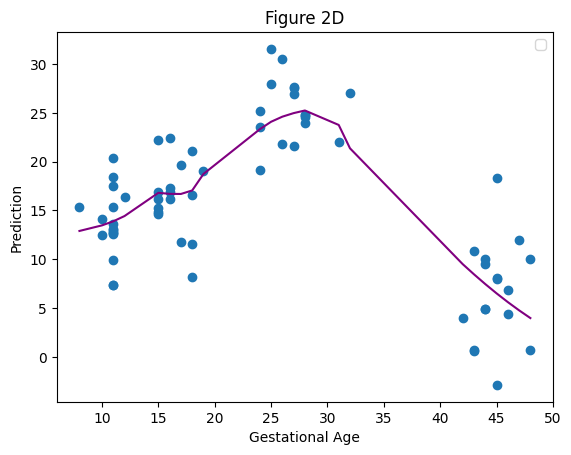

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Sample data

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.scatter(y_fin, y_fin_pred)
# Create a DataFrame to store the data
data_df = pd.DataFrame({'True Label (x)': y_fin, 'Predicted Label (y)': y_fin_pred})

# Sort the data by true labels (x) for a smooth curve
data_df = data_df.sort_values(by='True Label (x)')

# Lowess smoothing
lowess = sm.nonparametric.lowess(data_df['Predicted Label (y)'], data_df['True Label (x)'], frac=0.42)

# # Initialize a plot
# plt.figure(figsize=(8, 6))

# Plot the smoothed curve
plt.plot(lowess[:, 0], lowess[:, 1], color='purple')
# Add labels and a legend
ax.set_xlabel('Gestational Age')
ax.set_ylabel('Prediction')
ax.set_title('Figure 2D')
ax.legend()

# Display the plot
plt.show()


### Sex of the baby

Try using a neural network in Tensorflow or PyTorch to predict the sex of the baby.

#### Normal k-fold CV

In [35]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [36]:
data_multiomics.head()

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                           
0                   T  PTLG002  16661779                   10565    Male   
1                   T  PTLG002  16661779                   10565    Male   
2                   T  PTLG002  16661779                   10565    Male   
3                   T  PTLG002  16661779                   10565    Male   
4                   T  PTLG004  23587868                   10603  Female   

  sex_bin timepoint gestational_age cellfree_rna                ...  \
                                       0_C2orf76      1_ACTL10  ...   
0       1         1              11     0.312437 -1.892930e-16  ...   
1       1         2              18     0.312437 -1.892930e-16  ...   
2       1         3              32     0.312437 -1.892930e-16  ...   
3       1         4              45     0.312437 -1.892930e-16  ...   
4       0         1              11     5.204209  1.734736e+00  ...   

  plasma_somalogic                                                             \
       1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1 1295_SERPINF1   
0           4804.4      2233.0     3610.9     715.8       151.4       37885.8   
1           4086.0      2160.5     2260.4     825.2       161.0       41821.5   
2           4328.0      1818.4     2445.2    1241.8       194.6       45526.1   
3           3442.4      2661.4     3879.2     703.6       153.7       36862.5   
4           4261.9      1804.6     1470.6     526.8       163.0       38938.3   

                                              
  1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0    1479.1    3261.8      561.3      3227.0  
1    1465.1    1839.8      597.8      3366.0  
2    1428.3    3057.2      625.7      8703.7  
3    1063.6    7339.7      593.2      2918.9  
4    1170.1    1036.8      552.8      3457.1  

[5 rows x 61274 columns]

In [37]:
data_multiomics.columns

MultiIndex([(    'Training/Validation',              ''),
            (               'Gates ID',              ''),
            (                    'MRN',              ''),
            ('Study Subject ID Number',              ''),
            (                    'Sex',              ''),
            (                'sex_bin',              ''),
            (              'timepoint',              ''),
            (        'gestational_age',              ''),
            (           'cellfree_rna',     '0_C2orf76'),
            (           'cellfree_rna',      '1_ACTL10'),
            ...
            (       'plasma_somalogic',   '1290_UBE2G2'),
            (       'plasma_somalogic',   '1291_TAGLN2'),
            (       'plasma_somalogic',    '1292_ATP5O'),
            (       'plasma_somalogic',     '1293_POMC'),
            (       'plasma_somalogic',   '1294_CRYZL1'),
            (       'plasma_somalogic', '1295_SERPINF1'),
            (       'plasma_somalogic',     '1296_CTSF')

In [38]:
X = data_multiomics.drop(["Training/Validation", "Gates ID", "MRN", "Study Subject ID Number","Sex", "sex_bin","timepoint"], axis=1)

<ipython-input-38-2da63a4685a5>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = data_multiomics.drop(["Training/Validation", "Gates ID", "MRN", "Study Subject ID Number","Sex", "sex_bin","timepoint"], axis=1)


In [39]:
X.head()

gestational_age cellfree_rna                                           \
                     0_C2orf76      1_ACTL10   2_CEP135 3_RP11-613M10.6   
0              11     0.312437 -1.892930e-16  28.217854   -5.273559e-18   
1              18     0.312437 -1.892930e-16  28.217854   -5.273559e-18   
2              32     0.312437 -1.892930e-16  28.217854   -5.273559e-18   
3              45     0.312437 -1.892930e-16  28.217854   -5.273559e-18   
4              11     5.204209  1.734736e+00  53.776824    0.000000e+00   

                                                                       ...  \
     4_NDUFB5P1     5_MIIP 6_RP11-98I9.4   7_C20orf144 8_RP11-485G7.6  ...   
0 -6.106227e-18  10.107555      0.070008 -3.885781e-16  -4.113376e-16  ...   
1 -6.106227e-18  10.107555      0.070008 -3.885781e-16  -4.113376e-16  ...   
2 -6.106227e-18  10.107555      0.070008 -3.885781e-16  -4.113376e-16  ...   
3 -6.106227e-18  10.107555      0.070008 -3.885781e-16  -4.113376e-16  ...   
4  0.000000e+00   4.336841      1.734736  0.000000e+00   0.000000e+00  ...   

  plasma_somalogic                                                             \
       1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1 1295_SERPINF1   
0           4804.4      2233.0     3610.9     715.8       151.4       37885.8   
1           4086.0      2160.5     2260.4     825.2       161.0       41821.5   
2           4328.0      1818.4     2445.2    1241.8       194.6       45526.1   
3           3442.4      2661.4     3879.2     703.6       153.7       36862.5   
4           4261.9      1804.6     1470.6     526.8       163.0       38938.3   

                                              
  1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0    1479.1    3261.8      561.3      3227.0  
1    1465.1    1839.8      597.8      3366.0  
2    1428.3    3057.2      625.7      8703.7  
3    1063.6    7339.7      593.2      2918.9  
4    1170.1    1036.8      552.8      3457.1  

[5 rows x 61267 columns]

In [40]:
y = data_multiomics["sex_bin"]

In [41]:
y_categorical = to_categorical(y)

In [42]:
# Initialize cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [43]:
X = X.to_numpy()

In [44]:
X.shape

(68, 61267)

In [45]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on your training data
scaler.fit(X)

# Transform (normalize) the training data
X_train_normalized = scaler.transform(X)

In [46]:
X = X_train_normalized

In [47]:
# Initialize variables to store cross-validation results
accuracies = []

# Define the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]

    model = create_model()
    model.fit(X_train, y_train, epochs=50, verbose=0)

    _, accuracy = model.evaluate(X_test, y_test)
    accuracies.append(accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")


1/1 [==============================] - 0s 149ms/step - loss: 124.7742 - accuracy: 0.6923


1/1 [==============================] - 0s 167ms/step - loss: 24.3414 - accuracy: 0.6154
Mean Accuracy: 69.01%


#### Paper's CV

In [60]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [61]:
data_multiomics.head()

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                           
0                   T  PTLG002  16661779                   10565    Male   
1                   T  PTLG002  16661779                   10565    Male   
2                   T  PTLG002  16661779                   10565    Male   
3                   T  PTLG002  16661779                   10565    Male   
4                   T  PTLG004  23587868                   10603  Female   

  sex_bin timepoint gestational_age cellfree_rna                ...  \
                                       0_C2orf76      1_ACTL10  ...   
0       1         1              11     0.312437 -1.892930e-16  ...   
1       1         2              18     0.312437 -1.892930e-16  ...   
2       1         3              32     0.312437 -1.892930e-16  ...   
3       1         4              45     0.312437 -1.892930e-16  ...   
4       0         1              11     5.204209  1.734736e+00  ...   

  plasma_somalogic                                                             \
       1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1 1295_SERPINF1   
0           4804.4      2233.0     3610.9     715.8       151.4       37885.8   
1           4086.0      2160.5     2260.4     825.2       161.0       41821.5   
2           4328.0      1818.4     2445.2    1241.8       194.6       45526.1   
3           3442.4      2661.4     3879.2     703.6       153.7       36862.5   
4           4261.9      1804.6     1470.6     526.8       163.0       38938.3   

                                              
  1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0    1479.1    3261.8      561.3      3227.0  
1    1465.1    1839.8      597.8      3366.0  
2    1428.3    3057.2      625.7      8703.7  
3    1063.6    7339.7      593.2      2918.9  
4    1170.1    1036.8      552.8      3457.1  

[5 rows x 61274 columns]

In [62]:
X = data_multiomics.drop(["Training/Validation", "Gates ID", "MRN", "Study Subject ID Number","Sex", "sex_bin","timepoint"], axis=1)

<ipython-input-62-2da63a4685a5>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = data_multiomics.drop(["Training/Validation", "Gates ID", "MRN", "Study Subject ID Number","Sex", "sex_bin","timepoint"], axis=1)


In [63]:
X.head()

gestational_age cellfree_rna                                           \
                     0_C2orf76      1_ACTL10   2_CEP135 3_RP11-613M10.6   
0              11     0.312437 -1.892930e-16  28.217854   -5.273559e-18   
1              18     0.312437 -1.892930e-16  28.217854   -5.273559e-18   
2              32     0.312437 -1.892930e-16  28.217854   -5.273559e-18   
3              45     0.312437 -1.892930e-16  28.217854   -5.273559e-18   
4              11     5.204209  1.734736e+00  53.776824    0.000000e+00   

                                                                       ...  \
     4_NDUFB5P1     5_MIIP 6_RP11-98I9.4   7_C20orf144 8_RP11-485G7.6  ...   
0 -6.106227e-18  10.107555      0.070008 -3.885781e-16  -4.113376e-16  ...   
1 -6.106227e-18  10.107555      0.070008 -3.885781e-16  -4.113376e-16  ...   
2 -6.106227e-18  10.107555      0.070008 -3.885781e-16  -4.113376e-16  ...   
3 -6.106227e-18  10.107555      0.070008 -3.885781e-16  -4.113376e-16  ...   
4  0.000000e+00   4.336841      1.734736  0.000000e+00   0.000000e+00  ...   

  plasma_somalogic                                                             \
       1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1 1295_SERPINF1   
0           4804.4      2233.0     3610.9     715.8       151.4       37885.8   
1           4086.0      2160.5     2260.4     825.2       161.0       41821.5   
2           4328.0      1818.4     2445.2    1241.8       194.6       45526.1   
3           3442.4      2661.4     3879.2     703.6       153.7       36862.5   
4           4261.9      1804.6     1470.6     526.8       163.0       38938.3   

                                              
  1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0    1479.1    3261.8      561.3      3227.0  
1    1465.1    1839.8      597.8      3366.0  
2    1428.3    3057.2      625.7      8703.7  
3    1063.6    7339.7      593.2      2918.9  
4    1170.1    1036.8      552.8      3457.1  

[5 rows x 61267 columns]

In [64]:
y = data_multiomics["sex_bin"]

In [65]:
y_categorical = to_categorical(y)

In [66]:
X = X.to_numpy()

In [67]:
X.shape

(68, 61267)

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on your training data
scaler.fit(X)

# Transform (normalize) the training data
X_train_normalized = scaler.transform(X)

In [70]:
X = X_train_normalized

In [71]:
# Initialize variables to store cross-validation results
accuracies = []

# Define the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Set the number of folds and instances per test set
num_folds = 17
instances_per_fold = 4

# Calculate the total number of instances
total_instances = len(X)

# Calculate the step size for each fold
step_size = total_instances // num_folds


# Iterate through the folds
for fold_number in range(num_folds):
    # Calculate the starting and ending indices for the test set
    start_index = fold_number * instances_per_fold
    end_index = (fold_number + 1) * instances_per_fold

    # Extract the instances for the current test fold
    test_instances = X[start_index:end_index]
    test_labels = y_categorical[start_index:end_index]

    # Create the training set by excluding the test instances
    train_indices = np.concatenate([np.arange(start_index), np.arange(end_index, total_instances)])
    train_instances = X[train_indices]
    train_labels = y_categorical[train_indices]
    train_instances , train_labels = shuffle(train_instances, train_labels, random_state=14)
    model = create_model()
    model.fit(train_instances, train_labels, epochs=50, verbose=0)
    # print (train_indices,start_index,end_index)
    _, accuracy = model.evaluate(test_instances, test_labels)
    accuracies.append(accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")


1/1 [==============================] - 0s 205ms/step - loss: 0.0126 - accuracy: 1.0000
Mean Accuracy: 63.24%


### Feedback

Were the tasks above difficult, easy, or a mixture? In both cases, briefly describe why.

In general, the task was relatively straightforward, albeit with a few minor issues. In the exercise, there appears to be some ambiguity regarding the scope of Part 2, specifically concerning the utilization of the entire dataset as opposed to adhering to the guidelines established in Part 1, which involve exclusively utilizing the Immune System modality.

Furthermore, there is a lack of explicit instruction pertaining to whether we should adhere to the paper's prescribed implementation details or exercise discretion in our approach. Consequently, I have opted to construct my implementation in alignment with the notebook's directives, and another implementation with an emphasis on replicating the experiment outlined in the paper.